In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

## Generating Polynomial Data

In [128]:
def generate_polynomial_data(n, l=None, h=None, m=None, c=None, s=0.1, seed=None, deg=2):
    l = l if l else np.random.RandomState(seed).randint(-10, 0)
    h = h if h else np.random.RandomState(seed).randint(l + 10, 10)
    m = m if m else np.random.RandomState(seed).randn(1)
    c = c if c else np.random.RandomState(seed).randint(l, h, 1)
    x = np.random.uniform(l, h, n)
    y = m * np.power(x, deg) + c
    noise = s * np.random.randn(n) * (y.max() - y.min())
    y = y + noise
    return x, y

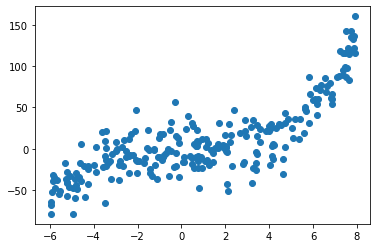

In [129]:
x_train, y_train = generate_polynomial_data(250, deg=3, seed=43)
plt.scatter(x_train, y_train)

## Simple Polynomial Regression Model

In [130]:
class SimplePolynomialRegressor:
    def __init__(self, degree=2, weight=None, bias=None, normalize=True):
        self.__degree = degree
        self.weight = weights if weight else np.random.randn(1)
        self.bias = bias if bias else np.random.randn(1)
        self.__normalize = normalize
        self.__scaling_params = (0, 1)
        self.loss_per_epochs = []
    
    def __transform(self, x):
        if self.__normalize:
            mu, s = self.__scaling_params
            x = x ** self.__degree
            x = (x - mu) / (s + 1e-9)
        return x
    
    def fit(self, x, y, epochs=1, batch_size=None, alpha=0.001, verbose=True):
        self.__scaling_params = (x.mean(), x.max() - x.min())
        x = self.__transform(x)
        losses = []
        for i in range(epochs):
            y_pred = self.weight * x + self.bias
            J = 0.5 * np.mean(np.square(y - y_pred))
            self.weight -= alpha * np.mean((y_pred - y) * x)
            self.bias -= alpha * np.mean(y_pred - y)
            losses.append(J)
            if verbose:
                print(f'Epoch {i+1}/{epochs}\n{x.shape[0]}/{x.shape[0]} [==============] : loss - {J}')
        self.loss_per_epochs = losses
    
    def predict(self, x):
        x = self.__transform(x)
        return self.weight * x + self.bias
    
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        J = 0.5 * np.mean(np.square(y - y_pred))
        return J
    
    def plot_fit_line(self, x, y):
        y_pred = self.predict(x)
        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, c='c', ec='k')
        o = x.argsort()
        plt.plot(x[o], y_pred[o], 'r', lw=3, label='y_pred')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Model Prediction Line')
        plt.legend(loc='best')
        
    def get_weights(self, return_scaling_params=False):
        "returns weights as a dict object with keys - `weight` and `bias`"
        model_weights = {'weight' : self.weight, 'bias' : self.bias}
        if return_scaling_params:
            model_weights['scaling_mean'], model_weights['scaling_std'] = self.__scaling_params
        return model_weights

## Training

In [131]:
model = SimplePolynomialRegressor()

In [132]:
model.fit(x_train, y_train, epochs=50, alpha=0.5)

Epoch 1/50
250/250 [==============] : loss - 1156.2863838621927
Epoch 2/50
250/250 [==============] : loss - 936.4559485881276
Epoch 3/50
250/250 [==============] : loss - 808.401510456684
Epoch 4/50
250/250 [==============] : loss - 733.7967153450951
Epoch 5/50
250/250 [==============] : loss - 690.325190148089
Epoch 6/50
250/250 [==============] : loss - 664.9908401260903
Epoch 7/50
250/250 [==============] : loss - 650.2241853994387
Epoch 8/50
250/250 [==============] : loss - 641.615781463911
Epoch 9/50
250/250 [==============] : loss - 636.5966103558013
Epoch 10/50
250/250 [==============] : loss - 633.669690160957
Epoch 11/50
250/250 [==============] : loss - 631.9625863603366
Epoch 12/50
250/250 [==============] : loss - 630.9667687972707
Epoch 13/50
250/250 [==============] : loss - 630.3857755876408
Epoch 14/50
250/250 [==============] : loss - 630.0467485347791
Epoch 15/50
250/250 [==============] : loss - 629.8488829531711
Epoch 16/50
250/250 [==============] : loss - 629.73

Text(0.5, 1.0, 'Training Loss')

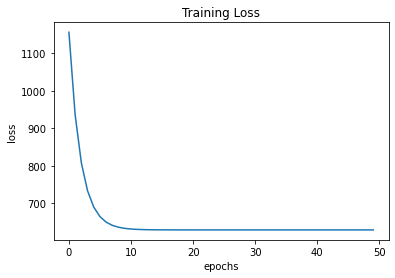

In [133]:
plt.plot(model.loss_per_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training Loss')

In [134]:
min(model.loss_per_epochs)

629.5712627585069

## Predictions

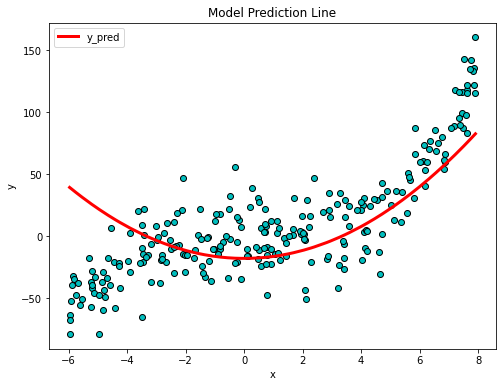

In [135]:
model.plot_fit_line(x_train, y_train)

In [136]:
indices = np.random.permutation(np.arange(x_train.shape[0]))[:100]
y_pred = model.predict(x_train[indices])
y_true = y_train[indices]

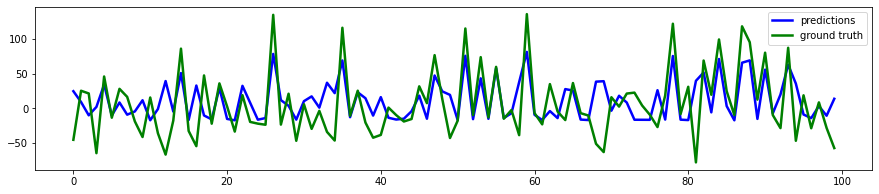

In [137]:
plt.figure(figsize=(15,3))
plt.plot(y_pred, 'b', lw=2.5, label='predictions')
plt.plot(y_true, 'g', lw=2.5, label='ground truth')
plt.legend(loc='best')

## Improving Model Performance

In [138]:
model = SimplePolynomialRegressor(degree=3)

In [139]:
model.fit(x_train, y_train, epochs=50, alpha=0.01)

Epoch 1/50
250/250 [==============] : loss - 1300.867383125873
Epoch 2/50
250/250 [==============] : loss - 348.74296315388
Epoch 3/50
250/250 [==============] : loss - 210.77824338258517
Epoch 4/50
250/250 [==============] : loss - 190.71119882657047
Epoch 5/50
250/250 [==============] : loss - 187.718175657858
Epoch 6/50
250/250 [==============] : loss - 187.19917249489572
Epoch 7/50
250/250 [==============] : loss - 187.0399780406643
Epoch 8/50
250/250 [==============] : loss - 186.93441148522268
Epoch 9/50
250/250 [==============] : loss - 186.83810802425512
Epoch 10/50
250/250 [==============] : loss - 186.74461614939372
Epoch 11/50
250/250 [==============] : loss - 186.65297495653078
Epoch 12/50
250/250 [==============] : loss - 186.56301910373583
Epoch 13/50
250/250 [==============] : loss - 186.4746989274497
Epoch 14/50
250/250 [==============] : loss - 186.38798198191446
Epoch 15/50
250/250 [==============] : loss - 186.30283877292194
Epoch 16/50
250/250 [==============] : los

Text(0.5, 1.0, 'Training Loss')

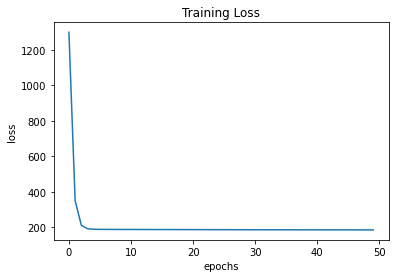

In [140]:
plt.plot(model.loss_per_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training Loss')

In [141]:
min(model.loss_per_epochs)

184.12283913552739

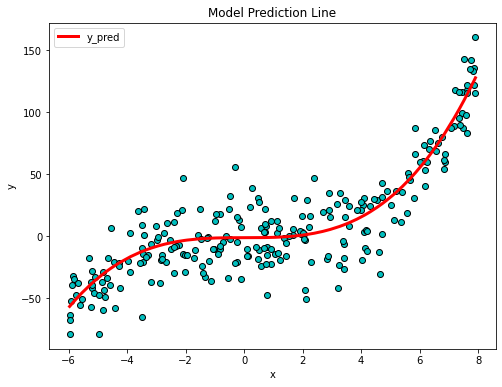

In [142]:
model.plot_fit_line(x_train, y_train)

In [143]:
indices = np.random.permutation(np.arange(x_train.shape[0]))[:100]
y_pred = model.predict(x_train[indices])
y_true = y_train[indices]

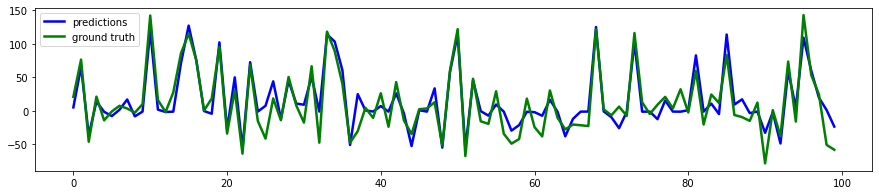

In [144]:
plt.figure(figsize=(15,3))
plt.plot(y_pred, 'b', lw=2.5, label='predictions')
plt.plot(y_true, 'g', lw=2.5, label='ground truth')
plt.legend(loc='best')

In [145]:
model.get_weights()

{'weight': array([3.61420861]), 'bias': array([-0.82980197])}

## Evaluation

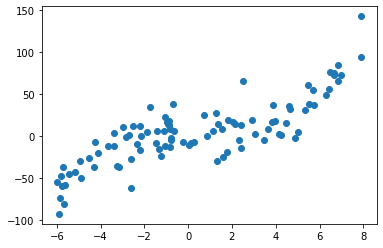

In [146]:
x_test, y_test = generate_polynomial_data(100, deg=3, seed=43)
plt.scatter(x_test, y_test);

In [147]:
model.evaluate(x_test, y_test)

160.6635257102729

In [148]:
y_pred = model.predict(x_test)

In [149]:
test_loss = 0.5 * np.mean((y_pred - y_test) ** 2)
print('test loss : ', test_loss)

test loss :  160.6635257102729


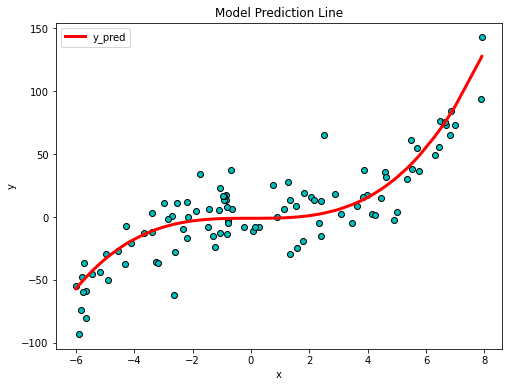

In [150]:
model.plot_fit_line(x_test, y_test)

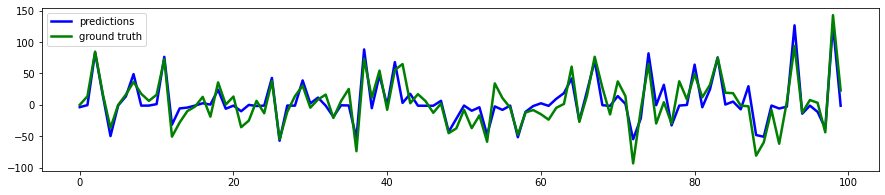

In [151]:
plt.figure(figsize=(15,3))
plt.plot(y_pred, 'b', lw=2.5, label='predictions')
plt.plot(y_test, 'g', lw=2.5, label='ground truth')
plt.legend(loc='best')